# Funciones extra

In [7]:
# Plot polynomials

def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

In [8]:
# Parse polynomial with coefficients

def parsePoly(poly):
    var('x')
    ans = 0
    mono = 1;
    for i in range(len(poly.list())):
        ans += poly.list()[i] * mono
        mono *= x
    return ans

In [9]:
# Plot polynomials with interpolation method "interpolation"

def plotPolylines(groups, name, interpolation):
    polynomials = []
    L = []
    R = []
    for points in groups:
        p = parsePoly(interpolation(points))
        polynomials.append(p)
        minimum = points[0][0]
        maximum = points[0][0]
        for i in range(1, len(points)):
            if points[i][0] < minimum: minimum = points[i][0]
            if points[i][0] > maximum: maximum = points[i][0]
        L.append(minimum)
        R.append(maximum)
    plotPoly(polynomials, name, L, R)

In [10]:
from sage.misc.lazy_format import LazyFormat

def printPolynomials(polys):
    for p in polys:
        print(p[0])
        print(LazyFormat("L = %d") % p[1])
        print(LazyFormat("R = %d") % p[2])

In [11]:
def plotSpline(polys, name):
    polynomials = []
    L = []
    R = []
    for p in polys:
        polynomials.append(p[0])
        L.append(p[1])
        R.append(p[2])
    plotPoly(polynomials, name, L, R)

# Algoritmos para Spline Cubica con Terminación Parabólica

In [24]:
def Gaussian(a, b):
    n = len(a)
    assert(n > 1)
    m = len(a[0])
    assert(m > 1)
    assert(len(b) == n)
    EPS = 1e-15
    ans = [None for _ in range(m)]
    where = [-1 for _ in range(m)]
    row = 0
    col = 0
    while(row < n and col < m):
        sel = row
        for i in range(row, n):
            if abs(a[i][col]) > abs(a[sel][col]):
                sel = i
        if abs(a[sel][col]) < EPS:
            continue
        for i in range(col, m):
            a[sel][i], a[row][i] = a[row][i], a[sel][i]
        b[sel], b[row] = b[row], b[sel]
        where[col] = row
        for i in range(n):
            if i == row: continue
            c = a[i][col] / a[row][col]
            for j in range(col, m):
                a[i][j] -= a[row][j] * c
            b[i] -= b[row] * c
        row += 1
        col += 1
    for i in range(m):
        if where[i] == -1: continue
        ans[i] = b[where[i]] / a[where[i]][i]
    for i in range(n):
        s = 0
        for j in range(m):
            s += a[i][j] * ans[j]
        if abs(s - b[i]) > EPS:
            for k in range(m):
                ans[k] = None
            return ans
    return ans

In [33]:
def Newton(points):
    #x = R.0
    var('x')
    n = len(points)
    assert(n > 1)
    print(points)
    memo = matrix(QQ, n, n, 0)
    for i in range(n):
        memo[i, 0] = points[i][1]
    for l in range(1, n):
        for i in range(0, n - l):
            memo[i, l] = (memo[i+1][l-1] - memo[i][l-1]) / (points[i+l][0] - points[i][0])
    ans = 0
    prefix = 1
    for i in range(n):
        ans += prefix * memo[0][i]
        if i + 1 < n: prefix *= (x - points[i][0])   
    return ans

# Ejemplo

[(211, 395), (279, 423), (291, 460), (311, 480)]
[(211, 395), (279, 423), (291, 460), (311, 480)]


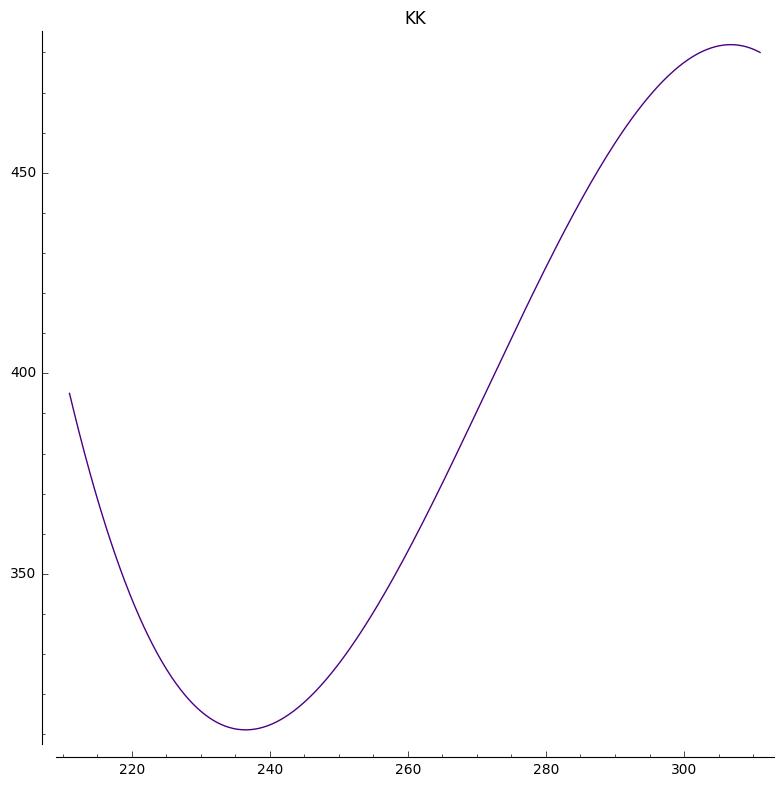

In [34]:
def transform(points):
    new_points = []
    i = len(points) - 1
    while i >= 0:
        new_points.append((points[i][1], 609 - points[i][0]))
        i -= 1
    return new_points

points = [(129, 311), (149, 291), (186, 279), (214, 211)]

new_points = transform(points)

print(new_points)

L = 1e9
R = -1e9
for x in new_points:
    L = min(L, x[0])
    R = max(R, x[0])

P = Newton(transform(points))

plotPoly([P], "KK", [L], [R])

[50/21, 50/21, -8/7, -8/7]


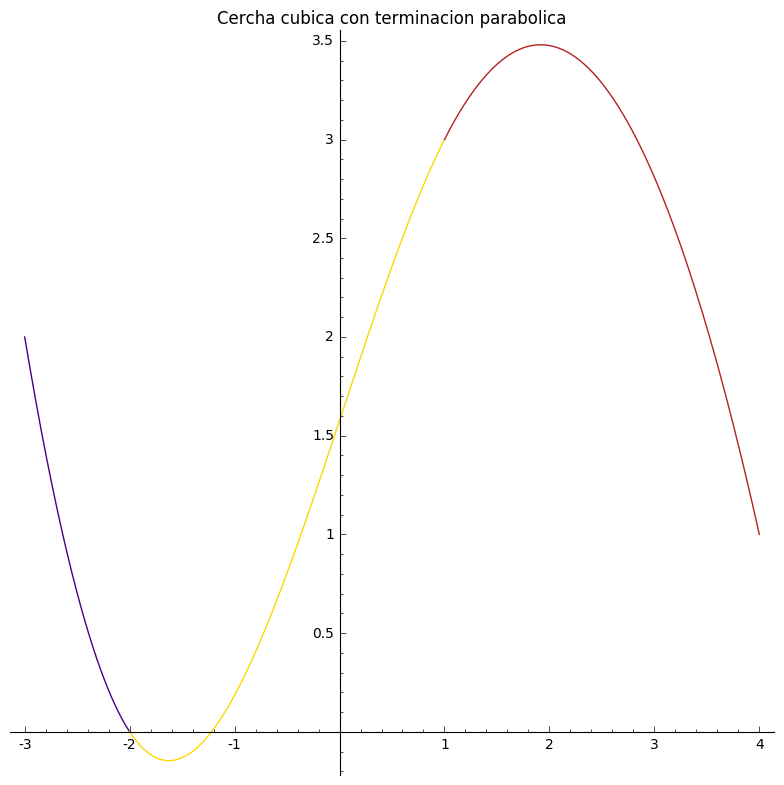

In [19]:
points = [(-3, 2), (-2, 0), (1, 3), (4, 1)]

P = CubicSplineParabolica(points)

plotSpline(P, "Cercha cubica con terminacion parabolica")